In [87]:
# Mount the Goole drive to Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
    # importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core import describe
import random
import math
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from pandas.core.common import random_state

In [ ]:
# Read .txt files

path = '/content/drive/MyDrive/final_project_data/seeds_dataset.txt'
# reading the .xls file into a dataframe
seed_data = pd.read_csv(path, sep = '\s{1,}', 
                              engine = 'python', header=None)


**Splitting the testing data before clustering**

In [ ]:
# getting the name of the last column that has class label
last_column = list(seed_data.columns)[-1]

# taking the random 10 rows of each class labels as testing data
ten_label_1_data = seed_data.loc[(seed_data[last_column]== 1)].sample(10, random_state=1)
ten_label_2_data = seed_data.loc[(seed_data[last_column]== 2)].sample(10, random_state=1)
ten_label_3_data = seed_data.loc[(seed_data[last_column]== 3)].sample(10, random_state=1)
testing_df = pd.concat([ten_label_1_data, ten_label_2_data , ten_label_3_data ])

# creating a list of list from testing dataframe and class labels of each data point
testing_data_actual_labels = testing_df[testing_df.columns[-1]]
del testing_df[testing_df.columns[-1]]
testing_data = testing_df.values.tolist()

# Taking the remaining data points as the data for clustering
clustering_data = seed_data.drop(testing_df.index).reset_index(drop = True)

# dropping the last column of the dataframe.
# this column contains the class of the sample
labels = clustering_data[clustering_data.columns[-1]]
del clustering_data[clustering_data.columns[-1]]

In [ ]:
clustering_data

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
175,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
176,12.37,13.47,0.8567,5.204,2.960,3.919,5.001
177,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
178,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
testing_data

[[12.88, 13.5, 0.8879, 5.139, 3.119, 2.352, 4.607],
 [13.02, 13.76, 0.8641, 5.395, 3.026, 3.373, 4.825],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.313, 5.15],
 [14.52, 14.6, 0.8557, 5.741, 3.113, 1.481, 5.487],
 [12.74, 13.67, 0.8564, 5.395, 2.956, 2.504, 4.869],
 [11.42, 12.86, 0.8683, 5.008, 2.85, 2.7, 4.607],
 [14.86, 14.67, 0.8676, 5.678, 3.258, 2.129, 5.351],
 [16.2, 15.27, 0.8734, 5.826, 3.464, 2.823, 5.527],
 [14.79, 14.52, 0.8819, 5.545, 3.291, 2.704, 5.111],
 [15.49, 14.94, 0.8724, 5.757, 3.371, 3.412, 5.228],
 [15.38, 14.66, 0.899, 5.477, 3.465, 3.6, 5.439],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.238],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.526, 5.971],
 [15.99, 14.89, 0.9064, 5.363, 3.582, 3.336, 5.144],
 [18.98, 16.57, 0.8687, 6.449, 3.552, 2.144, 6.453],
 [18.3, 15.89, 0.9108, 5.979, 3.755, 2.837, 5.962],
 [20.03, 16.9, 0.8811, 6.493, 3.857, 3.063, 6.32],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [18.89, 16.23, 0.9008, 6.227, 3.769, 3.639, 5.966],
 [17.99, 15

In [90]:
def hierarchical_clustering(clustering_data, linkage, n_clusters):
  original_data = clustering_data.copy(deep = True)
  # defining a function to normalize the data
  def data_normalization(clustering_data_df):
    # creating a description dataframe to get the min and 
    # max value for each column(feature)
    description = clustering_data_df.describe().transpose()
    mean_norm = (clustering_data_df - description['min'])/(
          description['max'] - description['min'])
    # returning a list of list with normalized data
    data_for_clustering = mean_norm.values.tolist()
    return (data_for_clustering)

  # defining a function that returns the eucledian distance
  # between two vectors
  def euclidean_distance(vector_a, vector_b):
    p_minus_q_squared = 0
    if len(vector_a) != len(vector_b):
      return('Error! Vectors with different dimensions')
    else:
      for i in range(len(vector_a)):
        p_minus_q_squared += (vector_a[i]-vector_b[i])**2
      eucledian_distance = math.sqrt(p_minus_q_squared)
    return(eucledian_distance)

  # normalizing the data by calling the above function
  data = data_normalization(clustering_data)

  # creating a distance matrix for similarity measurement
  index_list = []
  column_list = []
  for i in range(len(data)):
    point = 'p'+ str(i)
    index_list.append(point)
    column_list.append(point)
  distance_matrix_dataframe = pd.DataFrame(columns = column_list, 
                                         index= index_list)
  
  # filling the above distance matrix by calling the distance
  # calculation function that was created above
  for p in range(len(data)):
    row_index = 'p' + str(p)
    for q in range(len(data)):
      col_index = 'p' + str(q)
      if q <= p:
        continue
      else:
        dist = euclidean_distance(data[p], data[q])
      distance_matrix_dataframe.loc[row_index, [col_index]] = [dist]
      distance_matrix_dataframe.loc[col_index, [row_index]] = [dist]

  # defining a function that performs a single linkage
  def single_linkage(distance_dataframe, merge_p1, merge_p2, new_cluster_name):
    new_column = []
    for row in distance_dataframe.index:
      # skipping over the rows and columns that are being merged 
      if row == merge_p1 or row == merge_p2:
        continue
      else:
        # finding the minimum distance from a given point
        # to the two points that are being merged
        if distance_dataframe.loc[row, [merge_p1]][0] <= distance_dataframe.loc[row, [merge_p2]][0]:
        # creating a new list with the distance values for the merged points
          new_column.append(distance_dataframe.loc[row, [merge_p1]][0])
        else:
          new_column.append(distance_dataframe.loc[row, [merge_p2]][0])
    # dropping the rows and columns of the points that are being merged
    distance_dataframe.drop(merge_p1, axis=1,inplace=True)
    distance_dataframe.drop(merge_p2, axis=1,inplace=True)
    distance_dataframe.drop(merge_p1, axis=0,inplace=True)
    distance_dataframe.drop(merge_p2, axis=0,inplace=True)
    # filling the rows and columns of the new distance matrix
    # with the distance values from above
    distance_dataframe[new_cluster_name] = new_column
    new_column.append(np.nan)
    distance_dataframe.loc[new_cluster_name, :] = new_column
    # returning the new distance matrix
    return(distance_dataframe)

  # defining a function that performs a complete linkage
  def complete_linkage(distance_dataframe, merge_p1, merge_p2, new_cluster_name):
    new_column = []
    for row in distance_dataframe.index:
      # skipping over the rows and columns that are being merged 
      if row == merge_p1 or row == merge_p2:
        continue
      else:
         # finding the maximum distance from a given point
        # to the two points that are being merged
        if distance_dataframe.loc[row, 
                              [merge_p1]][0] > distance_dataframe.loc[row, 
                                                                [merge_p2]][0]:
          new_column.append(distance_dataframe.loc[row, [merge_p1]][0])
        else:
          new_column.append(distance_dataframe.loc[row, [merge_p2]][0])
    distance_dataframe.drop(merge_p1, axis=1,inplace=True)
    distance_dataframe.drop(merge_p2, axis=1,inplace=True)
    distance_dataframe.drop(merge_p1, axis=0,inplace=True)
    distance_dataframe.drop(merge_p2, axis=0,inplace=True)
    # filling the rows and columns of the new distance matrix
    # with the distance values from above
    distance_dataframe[new_cluster_name] = new_column
    new_column.append(np.nan)
    distance_dataframe.loc[new_cluster_name, :] = new_column
    # returning the updated distance matrix
    return(distance_dataframe)  

  # defining a function that returns n number of cluster
  def return_n_cluster(datfrm_indx, track_cluster_aggregation):
    clestring = {}
    count_clus = 0
    # iterating through the indexes of the clusters
    for indxs in datfrm_indx:
      if indxs in track_cluster_aggregation.keys():
        my_list = track_cluster_aggregation[indxs]
        # checking to see if the new cluster exists in the tracking dictionary
        # the tracking dictionary keeps track of which points belong which cluster
        while [i for i in my_list if i in track_cluster_aggregation.keys()]:
          a = [i for i in my_list if i in track_cluster_aggregation.keys()]
          for k in a:
            my_list.extend(track_cluster_aggregation[k])
            a.remove(k)
          my_list.remove(k)
        cluster_value = my_list
      else:
        # if the index only represents one point(the original sample), 
        # the value of that index is assigned to the cluster
        cluster_value = [indxs]
      clestring[count_clus] = cluster_value
      count_clus+=1
    # returning the cluster that tells which point belong to which cluster
    return(clestring)  

  # creating a copy of the original dataframe matrix
  dataframe = distance_matrix_dataframe.copy(deep= True)
  # creating empty list and dictionary for dendogram and cluster length
  dendogram = []
  cluster_length = {}
  track_cluster_aggregation = {}
  for p_i in dataframe.index:
    cluster_length[p_i] = 1
  number_of_clusters = len(dataframe)
  # iterating n number of times, where n is the length of the our dataset
  for i in range(len(dataframe)):
    # when we only have last two points to merge
    if len(dataframe) == 2:
      row_col_indx = []
      for ind in dataframe.index:
        row_col_indx.append(ind)
      # when there are only two points left to merge, the final 
      # cluster will contain all the items in the dataset 
      ith_cluster = [row_col_indx[0], row_col_indx[1], 
                   dataframe.loc[row_col_indx[0], [row_col_indx[1]]][0], 
                   len(distance_matrix_dataframe)]
      dendogram.append(ith_cluster)
      break
    else:
      # identifying the points that are going to merge
      # by looking at the highest similarity/least distance
      point_1, point_2 = np.unravel_index(
        np.nanargmin(dataframe.values), dataframe.shape)
      min_distance = dataframe.iloc[[point_1], [point_2]]
      row = min_distance.index[0]
      column = min_distance.columns[0]
      dist = min_distance.loc[row, [column]][0]
      no_of_items_in_cluster = ([v for k,v in cluster_length.items() if 
                             k == row][0] 
                            + 
                            [v for k,v in cluster_length.items() if 
                             k == column][0])
      # keeping track of points that are being merged, distance between
      # them and the number of items in that cluster that has just been created 
      # by merging the two points
      ith_cluster = [row, column, dist, no_of_items_in_cluster]
      dendogram.append(ith_cluster)
      new_cluster = 'p' + str(len(distance_matrix_dataframe)+i)
      cluster_length[new_cluster] = no_of_items_in_cluster
      # checking the linkage criterian and calling the respective function from above
      if linkage.lower() == 'single':
        dataframe = single_linkage(dataframe, row, column, 
                             new_cluster)
      if linkage.lower() == 'complete':
        dataframe = complete_linkage(dataframe, row, column, 
                             new_cluster)
      # keeping track of the number of clusters and 
      # keeping track of new point-name that represents 
      # the merged points from previous iteration
      number_of_clusters-=1
      track_cluster_aggregation[new_cluster] = [row, column]
      count = 0
      dataframe_indices = dataframe.index
      # calling the above function to get n number of clusters
      cluster_dict = return_n_cluster(dataframe_indices, track_cluster_aggregation)
      # Since we used 'p1', 'p2', etc to represent the data points in our algorithm, 
      # adding 'p' as prefix to our indices of the original data and selecting 
      # original n-dimentional data points for the respective clusters
      if number_of_clusters == n_clusters:
        return_cluster = {}
        original_dataframe = original_data.rename(
            index=lambda s: 'p'+ str(s))
        for key, value in cluster_dict.items():
          return_cluster[key] = []
          for items in value:
            return_cluster[key].append(
                original_dataframe.loc[items].values.tolist())
  # returning the clusters and the matrix for plotting dendogram
  return(return_cluster, dendogram)

In [139]:
# defining a function to calculate the accuracy of the clusters
def calculate_accuaracy(data, labels, cluster_dict):
  labeled_cluster = []
  overall_accuracy = 0
  # labeling each cluster by looking at highest occuring class label in
  # respective clusters
  for key, values in cluster_dict.items():
    if len(values) == 0:
      continue
    else:
      total_cluster_labels = []
      for p in range(len(values)):
        for q in range(len(data)):
          if values[p] == data[q]:
            label = labels[q]
            total_cluster_labels.append(label)
      most_freq_label = max(set(total_cluster_labels), 
                        key = total_cluster_labels.count)
      score = 0
      total_predicted = 0
      for p in range(len(values)):
        for q in range(len(data)):
          if values[p] == data[q]:
            total_predicted+=1
            if labels[q] == most_freq_label:
              score+=1
      accuracy_of_each_cluster = (score/total_predicted) * (len(values)/len(data))
      overall_accuracy += accuracy_of_each_cluster
  # calulating overall accuracy of the clusters based on the number of 
  # correct class label and number of items in those clusters
  #overall_accuracy = 0
  #for key, values in labeled_cluster.items():
    #predicted_labels = []
    #actual_labels = []
    #for value_i in values:
      #for i in range(len(data)):
        #if value_i == data[i]:
          #actual_labels.append(labels[i])
          #predicted_labels.append(key)

    #score = 0
    #for a in range(len(predicted_labels)):
      #if predicted_labels[a] == actual_labels[a]:
        #score+=1
    #accuracy_of_each_cluster = (score/len(predicted_labels)) * (len(values)/len(data))
    #overall_accuracy += accuracy_of_each_cluster
  # returning the overall accuracy of given clusters
  return(overall_accuracy)

**Single Linkage**

In [140]:
# checking to see if the above algorithm for checking accuracy is correct
# the accuracy for higher number of clusters should be higher

data_list = clustering_data.values.tolist()
clusters, dendogram = hierarchical_clustering(clustering_data, 
                        linkage = 'single', 
                        n_clusters = 178)
accuracy = calculate_accuaracy(data_list, labels, clusters)
print('When k = ', 178, 'accuracy is equal to:', accuracy)

When k =  178 accuracy is equal to: 0.9999999999999974


In [99]:
clusters

{0: [[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]],
 1: [[14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956]],
 2: [[14.29, 14.09, 0.905, 5.291, 3.337, 2.699, 4.825]],
 3: [[13.84, 13.94, 0.8955, 5.324, 3.379, 2.259, 4.805]],
 4: [[16.14, 14.99, 0.9034, 5.658, 3.562, 1.355, 5.175]],
 5: [[14.38, 14.21, 0.8951, 5.386, 3.312, 2.462, 4.956]],
 6: [[14.69, 14.49, 0.8799, 5.563, 3.259, 3.586, 5.219]],
 7: [[14.11, 14.1, 0.8911, 5.42, 3.302, 2.7, 5.0]],
 8: [[16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877]],
 9: [[16.44, 15.25, 0.888, 5.884, 3.505, 1.969, 5.533]],
 10: [[15.26, 14.85, 0.8696, 5.714, 3.242, 4.543, 5.314]],
 11: [[14.03, 14.16, 0.8796, 5.438, 3.201, 1.717, 5.001]],
 12: [[13.89, 14.02, 0.888, 5.439, 3.199, 3.986, 4.738]],
 13: [[13.78, 14.06, 0.8759, 5.479, 3.156, 3.136, 4.872]],
 14: [[13.74, 14.05, 0.8744, 5.482, 3.114, 2.932, 4.825]],
 15: [[14.59, 14.28, 0.8993, 5.351, 3.333, 4.185, 4.781]],
 16: [[13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781]],
 17: [[15.69, 14.75

In [141]:
data_list = clustering_data.values.tolist()
for i in range(1,10):
  clusters, dendogram = hierarchical_clustering(clustering_data, 
                        linkage = 'single', 
                        n_clusters = i+1)
  accuracy = calculate_accuaracy(data_list, labels, clusters)
  print('When k = ', i+1, 'accuracy is equal to:', accuracy)


When k =  2 accuracy is equal to: 0.33888888888888885
When k =  3 accuracy is equal to: 0.35
When k =  4 accuracy is equal to: 0.35000000000000003
When k =  5 accuracy is equal to: 0.35555555555555557
When k =  6 accuracy is equal to: 0.3611111111111111
When k =  7 accuracy is equal to: 0.3666666666666667
When k =  8 accuracy is equal to: 0.3666666666666667
When k =  9 accuracy is equal to: 0.3722222222222222
When k =  10 accuracy is equal to: 0.3777777777777778


In [ ]:
clusters

{0: [[13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781]],
 1: [[14.28, 14.17, 0.8944, 5.397, 3.298, 6.685, 5.001]],
 2: [[15.78, 14.91, 0.8923, 5.674, 3.434, 5.593, 5.136]],
 3: [[12.11, 13.47, 0.8392, 5.159, 3.032, 1.502, 4.519]],
 4: [[11.23, 12.63, 0.884, 4.902, 2.879, 2.269, 4.703]],
 5: [[18.36, 16.52, 0.8452, 6.666, 3.485, 4.933, 6.448]],
 6: [[19.14, 16.61, 0.8722, 6.259, 3.737, 6.682, 6.053]],
 7: [[17.55, 15.66, 0.8991, 5.791, 3.69, 5.366, 5.661]],
 8: [[12.7, 13.41, 0.8874, 5.183, 3.091, 8.456, 5.0],
  [13.2, 13.66, 0.8883, 5.236, 3.232, 8.315, 5.056]],
 9: [[15.57, 15.15, 0.8527, 5.92, 3.231, 2.64, 5.879],
  [15.6, 15.11, 0.858, 5.832, 3.286, 2.725, 5.752],
  [16.63, 15.46, 0.8747, 6.053, 3.465, 2.04, 5.877],
  [17.08, 15.38, 0.9079, 5.832, 3.683, 2.956, 5.484],
  [12.21, 13.47, 0.8453, 5.357, 2.893, 1.661, 5.178],
  [13.16, 13.82, 0.8662, 5.454, 2.975, 0.8551, 5.056],
  [11.87, 13.02, 0.8795, 5.132, 2.953, 3.597, 5.132],
  [12.78, 13.57, 0.8716, 5.262, 3.026, 1.176, 4.782],

In [ ]:
for merge in dendogram:
  merge[0] = int(float(merge[0][1:]))
  merge[1] = int(float(merge[1][1:]))
dendogram_array = np.array(dendogram)

<function matplotlib.pyplot.show(close=None, block=None)>

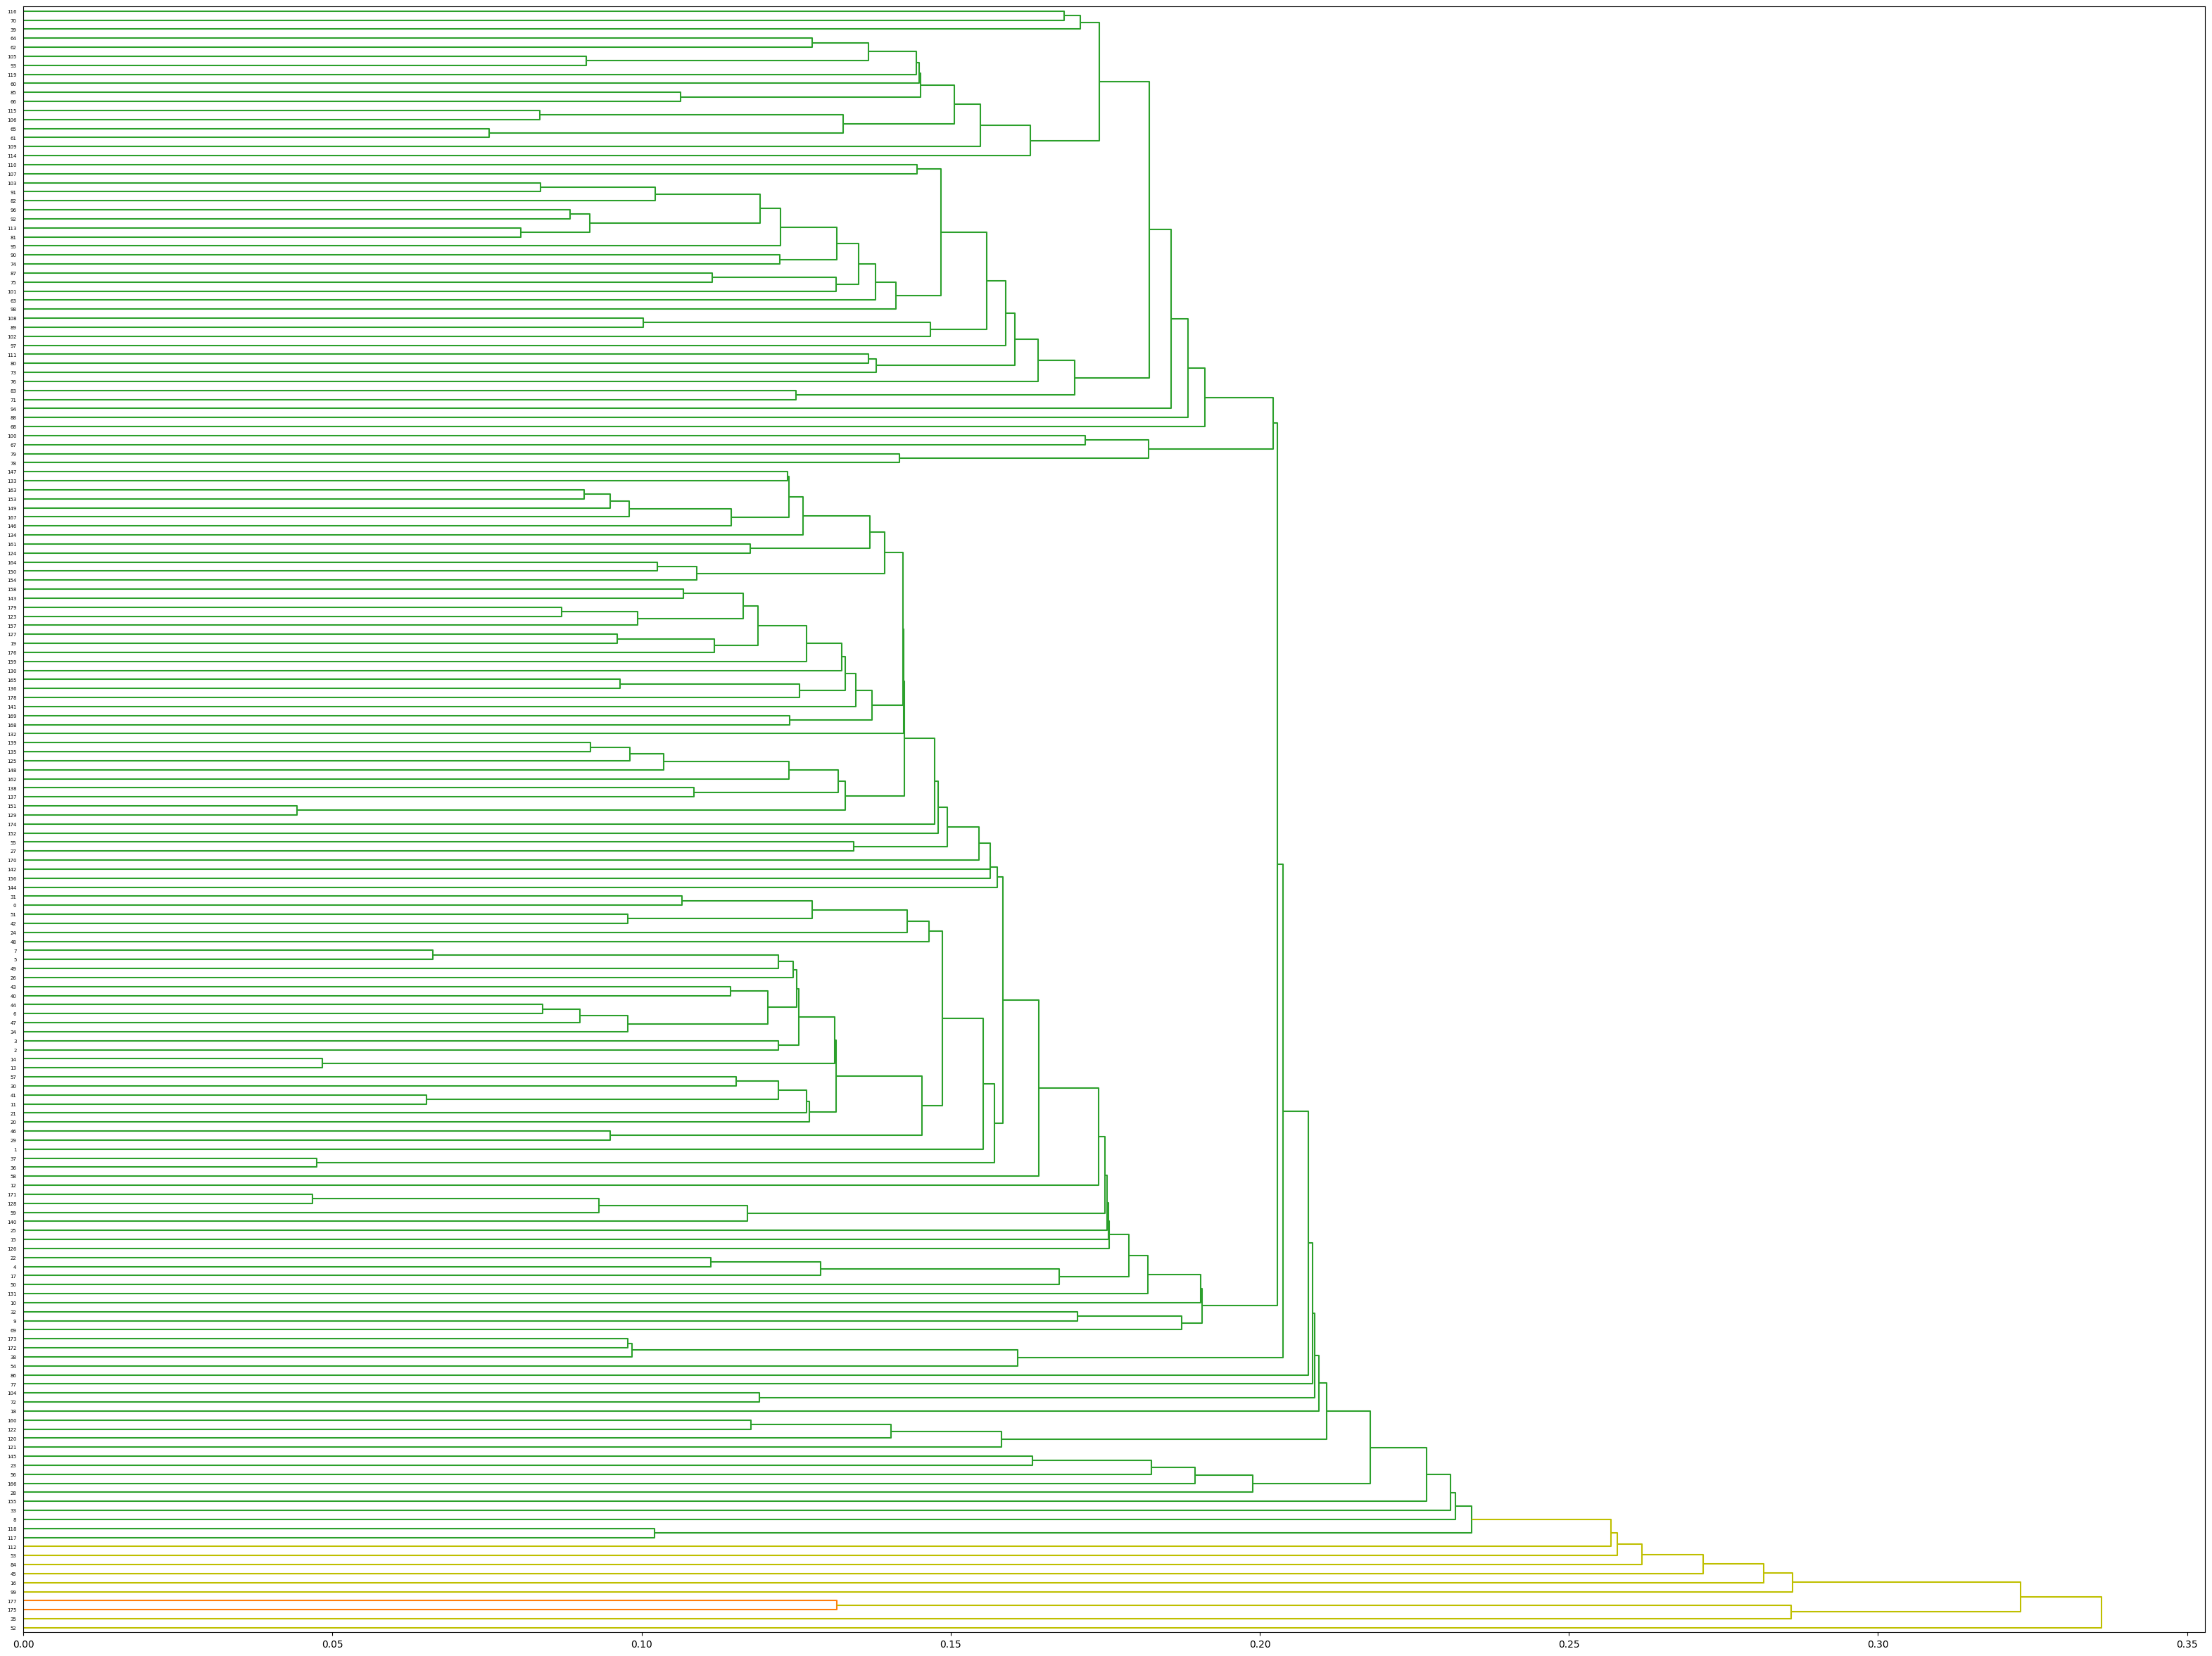

In [ ]:
fig = plt.figure(figsize=(40,30))
dn = hierarchy.dendrogram(dendogram_array, 
                          above_threshold_color='y',
                          orientation='right')
plt.show

**Complete Linkage**

In [142]:
data_list = clustering_data.values.tolist()
for i in range(1,10):
  clusters, dendogram = hierarchical_clustering(clustering_data, 
                        linkage = 'complete', 
                        n_clusters = i+1)
  accuracy = calculate_accuaracy(data_list, labels, clusters)
  print('When k = ', i+1, 'accuracy is equal to:', accuracy)


When k =  2 accuracy is equal to: 0.65
When k =  3 accuracy is equal to: 0.8666666666666667
When k =  4 accuracy is equal to: 0.8666666666666667
When k =  5 accuracy is equal to: 0.8666666666666667
When k =  6 accuracy is equal to: 0.8666666666666667
When k =  7 accuracy is equal to: 0.8666666666666667
When k =  8 accuracy is equal to: 0.8666666666666667
When k =  9 accuracy is equal to: 0.8666666666666667
When k =  10 accuracy is equal to: 0.8666666666666667


In [143]:
complete_link_clusters, complete_link_dendogram = hierarchical_clustering(clustering_data, 
                        linkage = 'complete', 
                        n_clusters = 3)

In [145]:
for merge in dendogram:
  merge[0] = int(float(merge[0][1:]))
  merge[1] = int(float(merge[1][1:]))
dendogram_array = np.array(dendogram)

<function matplotlib.pyplot.show(close=None, block=None)>

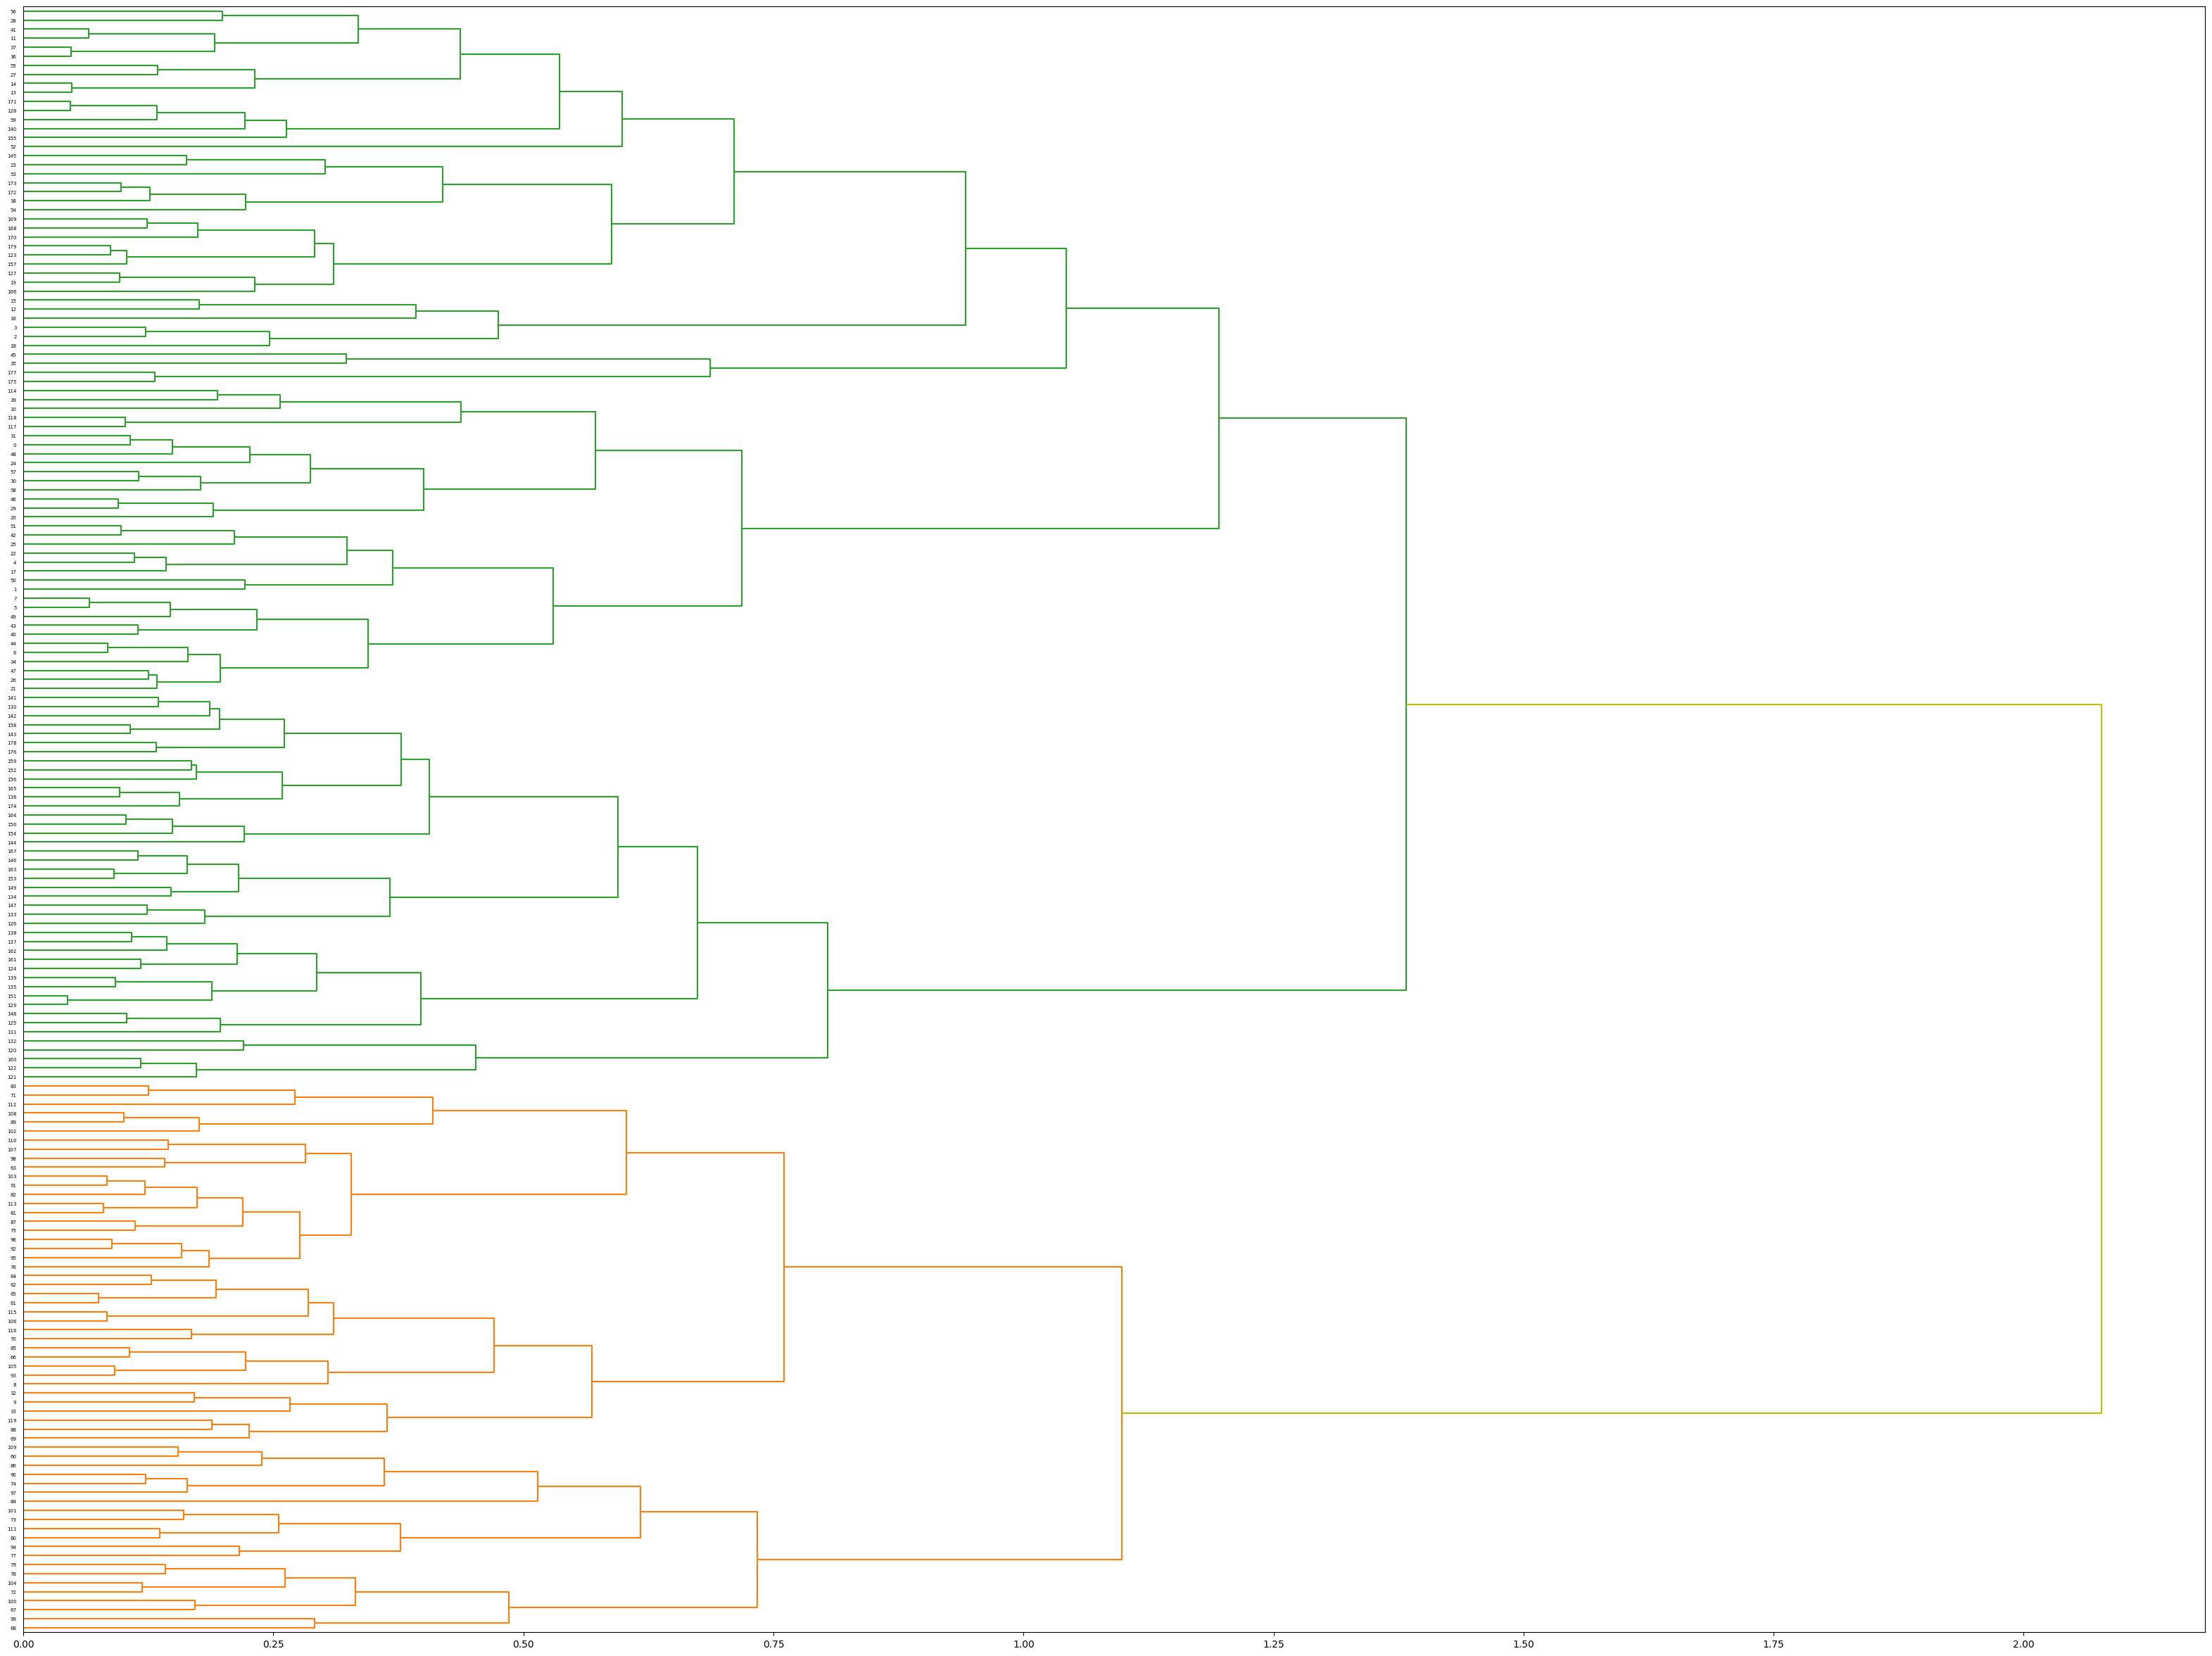

In [146]:
fig = plt.figure(figsize=(40,30))
dn = hierarchy.dendrogram(dendogram_array, 
                          above_threshold_color='y',
                          orientation='right')
plt.show

**Training the KNN Classifier**

In [147]:
def return_labeled_clusters(data, labels, cluster_dict):
  labeled_cluster = {}
  # labeling each cluster by looking at highest occuring class label in
  # respective clusters
  for key, values in cluster_dict.items():
    if len(values) == 0:
      continue
    else:
      total_cluster_labels = []
      for p in range(len(values)):
        for q in range(len(data)):
          if values[p] == data[q]:
            label = labels[q]
            total_cluster_labels.append(label)
      most_freq_label = max(set(total_cluster_labels), 
                        key = total_cluster_labels.count)
      labeled_cluster[most_freq_label] = values
  return(labeled_cluster)

In [148]:
data_list = clustering_data.values.tolist()
labeled_cluster = return_labeled_clusters(data_list, labels, complete_link_clusters)
labeled_cluster

{3: [[13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
  [13.34, 13.95, 0.862, 5.389, 3.074, 5.995, 5.307],
  [12.89, 13.77, 0.8541, 5.495, 3.026, 6.185, 5.316],
  [13.07, 13.92, 0.848, 5.472, 2.994, 5.304, 5.395],
  [12.26, 13.6, 0.8333, 5.408, 2.833, 4.756, 5.36],
  [12.01, 13.52, 0.8249, 5.405, 2.776, 6.992, 5.27],
  [11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275],
  [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.163],
  [10.79, 12.93, 0.8107, 5.317, 2.648, 5.462, 5.194],
  [10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185],
  [11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.219],
  [11.49, 13.22, 0.8263, 5.304, 2.695, 5.388, 5.31],
  [11.82, 13.4, 0.8274, 5.314, 2.777, 4.471, 5.178],
  [11.56, 13.31, 0.8198, 5.363, 2.683, 4.062, 5.182],
  [11.81, 13.45, 0.8198, 5.413, 2.716, 4.898, 5.352],
  [12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22],
  [11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31],
  [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132],
  [11.18, 13.04, 0.8266, 5.22, 2.693,

In [149]:
train_knn_classifier = []
for label, values in labeled_cluster.items():
  for features in values:
    feature_label = [features, label]
    train_knn_classifier.append(feature_label)
train_knn_classifier

[[[13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44], 3],
 [[13.34, 13.95, 0.862, 5.389, 3.074, 5.995, 5.307], 3],
 [[12.89, 13.77, 0.8541, 5.495, 3.026, 6.185, 5.316], 3],
 [[13.07, 13.92, 0.848, 5.472, 2.994, 5.304, 5.395], 3],
 [[12.26, 13.6, 0.8333, 5.408, 2.833, 4.756, 5.36], 3],
 [[12.01, 13.52, 0.8249, 5.405, 2.776, 6.992, 5.27], 3],
 [[11.21, 13.13, 0.8167, 5.279, 2.687, 6.169, 5.275], 3],
 [[11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.163], 3],
 [[10.79, 12.93, 0.8107, 5.317, 2.648, 5.462, 5.194], 3],
 [[10.83, 12.96, 0.8099, 5.278, 2.641, 5.182, 5.185], 3],
 [[11.19, 13.05, 0.8253, 5.25, 2.675, 5.813, 5.219], 3],
 [[11.49, 13.22, 0.8263, 5.304, 2.695, 5.388, 5.31], 3],
 [[11.82, 13.4, 0.8274, 5.314, 2.777, 4.471, 5.178], 3],
 [[11.56, 13.31, 0.8198, 5.363, 2.683, 4.062, 5.182], 3],
 [[11.81, 13.45, 0.8198, 5.413, 2.716, 4.898, 5.352], 3],
 [[12.13, 13.73, 0.8081, 5.394, 2.745, 4.825, 5.22], 3],
 [[11.75, 13.52, 0.8082, 5.444, 2.678, 4.378, 5.31], 3],
 [[11.43, 13.13, 0.8335, 5

In [150]:
def K_near_class_pred(training_data, testing_data, k):
  traind = training_data
  testd = testing_data
  distance = []
  dist_and_class= []
  for j in range(len(traind)):
    label_and_distance_list = []
    a = traind[j][0]
    sum = 0
    for i in range(len(a)):
      sum += ((a[i] - testd[i])**2)
    cartesian_dist = math.sqrt(sum)
    distance.append(cartesian_dist)
    label_and_distance_list.append(cartesian_dist) 
    label_and_distance_list.append(traind[j][1])
    dist_and_class.append(label_and_distance_list)

  def K_nearest_neighbor(k, distance, data_class):
    distance = sorted(distance)
    label = []
    for j in range(k):
      for i in range(len(data_class)):
        if distance[j] == data_class[i][0]:
          label.append(data_class[i][1])
    
    return(max(set(label), key = label.count))
  
  pred = K_nearest_neighbor(k, distance, dist_and_class)
  return (pred)

In [151]:
# defining a function to normalize the data
def train_test_data_normalization(data, train_or_test):
  if train_or_test.lower() == 'test':
    test_df = pd.DataFrame(data)
    # creating a description dataframe to get the min and 
    # max value for each column(feature)
    description = test_df.describe().transpose()
    mean_norm = (test_df - description['min'])/(
          description['max'] - description['min'])
    # returning a list of list with normalized data
    data_for_clustering = mean_norm.values.tolist()
    return (data_for_clustering)

  if train_or_test.lower() == 'train':
    label_list = []
    data_point = []
    for i in range(len(data)):
      label_list.append(data[i][1])
      data_point.append(data[i][0])
    train_df = pd.DataFrame(data_point)
    # creating a description dataframe to get the min and 
    # max value for each column(feature)
    description = train_df.describe().transpose()
    mean_norm = (train_df - description['min'])/(
          description['max'] - description['min'])
    # returning a list of list with normalized data
    mean_norm['class'] = label_list
    train_data_list = mean_norm.values.tolist()
    data_for_clustering = []
    for p in range(len(train_data_list)):
      label = train_data_list[p].pop(-1)
      ith_value = [train_data_list[p], label]
      data_for_clustering.append(ith_value)
  return (data_for_clustering)    

In [152]:
norm_train_knn = train_test_data_normalization(train_knn_classifier, 'train')
norm_test_knn = train_test_data_normalization(testing_data, 'test')

In [153]:
actual_y = testing_data_actual_labels.values.tolist()
for k in range(1,11):
  pred_y = []
  for i in range(len(norm_test_knn)):
    pred_yi = K_near_class_pred(norm_train_knn, norm_test_knn[i], k = k)
    pred_y.append(pred_yi)

  score = 0
  for i in range(len(pred_y)):
    if pred_y[i] == actual_y[i]:
      score+=1
  accuracy = score/len(pred_y)
  print('For k =', k, 'the accuracy is :', accuracy)

For k = 1 the accuracy is : 0.8333333333333334
For k = 2 the accuracy is : 0.8666666666666667
For k = 3 the accuracy is : 0.8666666666666667
For k = 4 the accuracy is : 0.9
For k = 5 the accuracy is : 0.9
For k = 6 the accuracy is : 0.8666666666666667
For k = 7 the accuracy is : 0.8333333333333334
For k = 8 the accuracy is : 0.8333333333333334
For k = 9 the accuracy is : 0.8333333333333334
For k = 10 the accuracy is : 0.8333333333333334


**Splitting the data to training and testing after the clustering:**

In [154]:
# Read .txt files

path = '/content/drive/MyDrive/final_project_data/seeds_dataset.txt'
# reading the .xls file into a dataframe
seed_data = pd.read_csv(path, sep = '\s{1,}', 
                              engine = 'python', header=None)

labels = seed_data[seed_data.columns[-1]]
del seed_data[seed_data.columns[-1]]

In [158]:
complete_link_clusters, complete_link_dendogram = hierarchical_clustering(seed_data, 
                        linkage = 'single', 
                        n_clusters = 5)

cluster_list = []
label_cid = []
for label, values in complete_link_clusters.items():
  for features in values:
    cluster_list.append(features)
    label_cid.append(label)
cluster_df = pd.DataFrame(cluster_list)
cluster_df['cluster ID'] = label_cid

# taking the random 10 rows of each class labels as testing data
ten_label_0_data = cluster_df.loc[(cluster_df['cluster ID']== 0)].sample(1, random_state=1)
ten_label_1_data = cluster_df.loc[(cluster_df['cluster ID']== 1)].sample(1, random_state=1)
ten_label_2_data = cluster_df.loc[(cluster_df['cluster ID']== 2)].sample(1, random_state=1)
ten_label_3_data = cluster_df.loc[(cluster_df['cluster ID']== 3)].sample(1, random_state=1)
ten_label_4_data = cluster_df.loc[(cluster_df['cluster ID']== 4)].sample(1, random_state=1)

testing_df = pd.concat([ten_label_0_data, ten_label_1_data , ten_label_2_data#]) 
                        ,ten_label_3_data, ten_label_4_data])

# creating a list of list from testing dataframe and class labels of each data point
testing_data_actual_labels = testing_df[testing_df.columns[-1]]
del testing_df[testing_df.columns[-1]]
testing_data = testing_df.values.tolist()

# Taking the remaining data points as the data for clustering
training_data = cluster_df.drop(testing_df.index).reset_index(drop = True)

training_list = training_data.values.tolist()
train_knn = []
for i in range(len(training_list)):
  label = training_list[i].pop(-1)
  train_knn.append([training_list[i],label])

actual_y = testing_data_actual_labels.values.tolist()
for k in range(1,20):
  pred_y = []
  for i in range(len(testing_data)):
    pred_yi = K_near_class_pred(train_knn, testing_data[i], k = k)
    pred_y.append(pred_yi)

  score = 0
  for i in range(len(pred_y)):
    if pred_y[i] == actual_y[i]:
      score+=1
  accuracy = score/len(pred_y)
  print('For k =', k, 'the accuracy is :', accuracy)

For k = 1 the accuracy is : 0.4
For k = 2 the accuracy is : 0.4
For k = 3 the accuracy is : 0.2
For k = 4 the accuracy is : 0.2
For k = 5 the accuracy is : 0.2
For k = 6 the accuracy is : 0.2
For k = 7 the accuracy is : 0.2
For k = 8 the accuracy is : 0.2
For k = 9 the accuracy is : 0.2
For k = 10 the accuracy is : 0.2
For k = 11 the accuracy is : 0.2
For k = 12 the accuracy is : 0.2
For k = 13 the accuracy is : 0.2
For k = 14 the accuracy is : 0.2
For k = 15 the accuracy is : 0.2
For k = 16 the accuracy is : 0.2
For k = 17 the accuracy is : 0.2
For k = 18 the accuracy is : 0.2
For k = 19 the accuracy is : 0.2


In [160]:
complete_link_clusters, complete_link_dendogram = hierarchical_clustering(seed_data, 
                        linkage = 'complete', 
                        n_clusters = 3)

cluster_list = []
label_cid = []
for label, values in complete_link_clusters.items():
  for features in values:
    cluster_list.append(features)
    label_cid.append(label)
cluster_df = pd.DataFrame(cluster_list)
cluster_df['cluster ID'] = label_cid

# taking the random 10 rows of each class labels as testing data
ten_label_0_data = cluster_df.loc[(cluster_df['cluster ID']== 0)].sample(10, random_state=1)
ten_label_1_data = cluster_df.loc[(cluster_df['cluster ID']== 1)].sample(10, random_state=1)
ten_label_2_data = cluster_df.loc[(cluster_df['cluster ID']== 2)].sample(10, random_state=1)
#ten_label_3_data = cluster_df.loc[(cluster_df['cluster ID']== 3)].sample(1, random_state=1)
#ten_label_4_data = cluster_df.loc[(cluster_df['cluster ID']== 4)].sample(1, random_state=1)

testing_df = pd.concat([ten_label_0_data, ten_label_1_data , ten_label_2_data]) 
                        #,ten_label_3_data, ten_label_4_data])

# creating a list of list from testing dataframe and class labels of each data point
testing_data_actual_labels = testing_df[testing_df.columns[-1]]
del testing_df[testing_df.columns[-1]]
testing_data = testing_df.values.tolist()

# Taking the remaining data points as the data for clustering
training_data = cluster_df.drop(testing_df.index).reset_index(drop = True)

training_list = training_data.values.tolist()
train_knn = []
for i in range(len(training_list)):
  label = training_list[i].pop(-1)
  train_knn.append([training_list[i],label])

actual_y = testing_data_actual_labels.values.tolist()
for k in range(1,20):
  pred_y = []
  for i in range(len(testing_data)):
    pred_yi = K_near_class_pred(train_knn, testing_data[i], k = k)
    pred_y.append(pred_yi)

  score = 0
  for i in range(len(pred_y)):
    if pred_y[i] == actual_y[i]:
      score+=1
  accuracy = score/len(pred_y)
  print('For k =', k, 'the accuracy is :', accuracy)

For k = 1 the accuracy is : 1.0
For k = 2 the accuracy is : 0.9666666666666667
For k = 3 the accuracy is : 0.9666666666666667
For k = 4 the accuracy is : 0.9666666666666667
For k = 5 the accuracy is : 0.9333333333333333
For k = 6 the accuracy is : 0.9333333333333333
For k = 7 the accuracy is : 0.9333333333333333
For k = 8 the accuracy is : 0.9666666666666667
For k = 9 the accuracy is : 0.9666666666666667
For k = 10 the accuracy is : 0.9666666666666667
For k = 11 the accuracy is : 0.9666666666666667
For k = 12 the accuracy is : 0.9666666666666667
For k = 13 the accuracy is : 0.9666666666666667
For k = 14 the accuracy is : 0.9666666666666667
For k = 15 the accuracy is : 0.9333333333333333
For k = 16 the accuracy is : 0.9333333333333333
For k = 17 the accuracy is : 0.9333333333333333
For k = 18 the accuracy is : 0.9333333333333333
For k = 19 the accuracy is : 0.9


**Testing to see how my KNN algorithm behaves on a 3 dimensional feature space**

**Visualizing the first Approach: Splitting the test set before clustering**

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris_df= pd.DataFrame(iris.data[:, :3])
iris_df['class'] = iris.target
iris_df

,0,1,2,class
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
fig = px.scatter_3d(iris_df, x=0, y=1, z=2,
                    color = 'class', title = 'Original Dataset')
fig.show()

In [ ]:
# getting the name of the last column that has class label
last_column = list(iris_df.columns)[-1]

# taking the random 10 rows of each class labels as testing data
ten_label_0_data = iris_df.loc[(iris_df[last_column]== 0)].sample(10, random_state=1)
ten_label_1_data = iris_df.loc[(iris_df[last_column]== 1)].sample(10, random_state=1)
ten_label_2_data = iris_df.loc[(iris_df[last_column]== 2)].sample(10, random_state=1)
testing_df = pd.concat([ten_label_0_data, ten_label_1_data , ten_label_2_data ])

# creating a list of list from testing dataframe and class labels of each data point
testing_data_actual_labels = testing_df[testing_df.columns[-1]]
del testing_df[testing_df.columns[-1]]
testing_data = testing_df.values.tolist()

# Taking the remaining data points as the data for clustering
clustering_data = iris_df.drop(testing_df.index).reset_index(drop = True)

# dropping the last column of the dataframe.
# this column contains the class of the sample
labels = clustering_data[clustering_data.columns[-1]]
del clustering_data[clustering_data.columns[-1]]

In [ ]:
iris_clustering = hierarchical_clustering(clustering_data, 'single', 10)

cluster_dictionary = iris_clustering[0]
data = clustering_data.values.tolist()
labeled_cluster = return_labeled_clusters(data, labels, cluster_dictionary)
cluster = []
cluster_class = []
for key, values in labeled_cluster.items():
  for data in values:
    cluster.append(data)
    cluster_class.append(key)
cluster_df = pd.DataFrame(cluster)
cluster_df['class'] = cluster_class


fig = px.scatter_3d(cluster_df, x=0, y=1, z=2,
                    color = 'class', title = 'Our data after clustering on single linkage')
fig.show()

In [ ]:
iris_clustering = hierarchical_clustering(clustering_data, 'complete', 10)

cluster_dictionary = iris_clustering[0]
data = clustering_data.values.tolist()
labeled_cluster = return_labeled_clusters(data, labels, cluster_dictionary)
cluster = []
cluster_class = []
for key, values in labeled_cluster.items():
  for data in values:
    cluster.append(data)
    cluster_class.append(key)
cluster_df = pd.DataFrame(cluster)
cluster_df['class'] = cluster_class


fig = px.scatter_3d(cluster_df, x=0, y=1, z=2,
                    color = 'class', title = 'Our data after clustering on complete linkage')
fig.show()

In [ ]:
# Plotting test data
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
fig = px.scatter_3d(pd.DataFrame(testing_data), x=0, y=1, z=2, title = 'Our Test data')
fig.show()

In [ ]:
train_knn_classifier = []
for label, values in labeled_cluster.items():
  for features in values:
    feature_label = [features, label]
    train_knn_classifier.append(feature_label)
train_knn_classifier

In [ ]:
for k in range(1,11):
  y_pred = []
  for i in range(len(testing_data)):
    pred = K_near_class_pred(train_knn_classifier, testing_data[i], k)
    y_pred.append(pred)
  test_df = pd.DataFrame(testing_data)
  test_df['pred class'] = y_pred

  # Plotting test data with predicted class
  ttle = 'When k =' + str(k)
  fig = px.scatter_3d(test_df, x=0, y=1, z=2, color = 'pred class', 
                      title = ttle)
  fig.show()

**Visualizing the second Approach: Splitting the test set after clustering**

In [ ]:
iris = datasets.load_iris()

iris_df= pd.DataFrame(iris.data[:, :3])
iris_df['class'] = iris.target
iris_df

complete_link_clusters, complete_link_dendogram = hierarchical_clustering(iris_df, 
                        linkage = 'complete', 
                        n_clusters = 3)

cluster_list = []
label_cid = []
for label, values in complete_link_clusters.items():
  for features in values:
    cluster_list.append(features)
    label_cid.append(label)
cluster_df = pd.DataFrame(cluster_list)
cluster_df['cluster ID'] = label_cid

# plotting to visualize the clusters
fig = px.scatter_3d(cluster_df, x=0, y=1, z=2, color = 'cluster ID', 
                    title = 'Our clusters')
fig.show()

# taking the random 10 rows of each class labels as testing data
ten_label_0_data = cluster_df.loc[(cluster_df['cluster ID']== 0)].sample(10, random_state=1)
ten_label_1_data = cluster_df.loc[(cluster_df['cluster ID']== 1)].sample(10, random_state=1)
ten_label_2_data = cluster_df.loc[(cluster_df['cluster ID']== 2)].sample(10, random_state=1)
#ten_label_3_data = cluster_df.loc[(cluster_df['cluster ID']== 3)].sample(10, random_state=1)
#ten_label_4_data = cluster_df.loc[(cluster_df['cluster ID']== 4)].sample(10, random_state=1)

testing_df = pd.concat([ten_label_0_data, ten_label_1_data , ten_label_2_data]) 
                        #,ten_label_3_data, ten_label_4_data])

# creating a list of list from testing dataframe and class labels of each data point
testing_data_actual_labels = testing_df[testing_df.columns[-1]]
del testing_df[testing_df.columns[-1]]
testing_data = testing_df.values.tolist()

# plotting to visualize the test data
fig = px.scatter_3d(pd.DataFrame(testing_data), x=0, y=1, z=2, title = 'Our Test data')
fig.show()


In [ ]:

# Taking the remaining data points as the data for clustering
training_data = cluster_df.drop(testing_df.index).reset_index(drop = True)

training_list = training_data.values.tolist()
train_knn = []
for i in range(len(training_list)):
  label = training_list[i].pop(-1)
  train_knn.append([training_list[i],label])

for k in range(1,11):
  pred_y = []
  for i in range(len(testing_data)):
    pred_yi = K_near_class_pred(train_knn, testing_data[i], k = k)
    pred_y.append(pred_yi)

  testing_data_with_pred_labels = pd.DataFrame(testing_data)
  testing_data_with_pred_labels['pred cluster id'] = pred_y

  tle = "Predicted cluster ID When k = " + str(k)
  fig = px.scatter_3d(testing_data_with_pred_labels, x=0, y=1, z=2, 
                      color = 'pred cluster id', title = tle)
  fig.show()